In [1]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

In [9]:

config_path = "./config_solar_trend_only.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

running_rmse = []
# _, loss_dict = model.model_test(0)
# running_rmse.append(loss_dict["test_RMSE"])


INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            model.msg_approx_tau(T_id)
            model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            # we only need  this to get the running metric, otherwise we can skip this
            model.inner_smooth()
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse.append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse_trend_only = np.array(running_rmse)


use device: cpu


  0%|          | 39/52560 [00:00<04:05, 213.93it/s]

T_id = 0, train_rmse = 11.34, test_rmse= 11.35,test_MAE= 9.75


  5%|▍         | 2534/52560 [00:08<05:35, 149.03it/s]

T_id = 2500, train_rmse = 10.00, test_rmse= 10.01,test_MAE= 7.04


 10%|▉         | 5033/52560 [00:17<10:02, 78.94it/s] 

T_id = 5000, train_rmse = 9.69, test_rmse= 9.70,test_MAE= 6.86


 14%|█▍        | 7542/52560 [00:26<09:42, 77.23it/s] 

T_id = 7500, train_rmse = 9.43, test_rmse= 9.44,test_MAE= 6.66


 19%|█▉        | 10040/52560 [00:36<12:00, 59.03it/s]

T_id = 10000, train_rmse = 9.10, test_rmse= 9.11,test_MAE= 6.40


 24%|██▍       | 12542/52560 [00:47<13:10, 50.65it/s] 

T_id = 12500, train_rmse = 8.77, test_rmse= 8.79,test_MAE= 6.09


 29%|██▊       | 15050/52560 [00:58<14:01, 44.60it/s] 

T_id = 15000, train_rmse = 8.41, test_rmse= 8.42,test_MAE= 5.74


 33%|███▎      | 17561/52560 [01:09<14:42, 39.68it/s] 

T_id = 17500, train_rmse = 8.06, test_rmse= 8.07,test_MAE= 5.41


 38%|███▊      | 20051/52560 [01:21<15:24, 35.18it/s] 

T_id = 20000, train_rmse = 7.74, test_rmse= 7.77,test_MAE= 5.10


 43%|████▎     | 22549/52560 [01:33<15:56, 31.38it/s] 

T_id = 22500, train_rmse = 7.35, test_rmse= 7.37,test_MAE= 4.73


 48%|████▊     | 25047/52560 [01:46<16:16, 28.18it/s] 

T_id = 25000, train_rmse = 6.96, test_rmse= 6.98,test_MAE= 4.37


 52%|█████▏    | 27532/52560 [01:59<16:28, 25.31it/s] 

T_id = 27500, train_rmse = 6.62, test_rmse= 6.65,test_MAE= 4.04


 57%|█████▋    | 30058/52560 [02:13<15:29, 24.20it/s] 

T_id = 30000, train_rmse = 6.28, test_rmse= 6.31,test_MAE= 3.72


 62%|██████▏   | 32561/52560 [02:27<14:53, 22.38it/s] 

T_id = 32500, train_rmse = 5.91, test_rmse= 5.95,test_MAE= 3.41


 67%|██████▋   | 35046/52560 [02:42<13:56, 20.93it/s] 

T_id = 35000, train_rmse = 5.55, test_rmse= 5.60,test_MAE= 3.09


 71%|███████▏  | 37557/52560 [02:57<12:52, 19.42it/s] 

T_id = 37500, train_rmse = 5.17, test_rmse= 5.22,test_MAE= 2.78


 76%|███████▌  | 40046/52560 [03:13<11:13, 18.59it/s] 

T_id = 40000, train_rmse = 4.68, test_rmse= 4.73,test_MAE= 2.43


 81%|████████  | 42558/52560 [03:30<10:02, 16.59it/s] 

T_id = 42500, train_rmse = 4.23, test_rmse= 4.29,test_MAE= 2.12


 86%|████████▌ | 45053/52560 [03:47<07:47, 16.04it/s] 

T_id = 45000, train_rmse = 3.71, test_rmse= 3.78,test_MAE= 1.80


 90%|█████████ | 47545/52560 [04:05<05:37, 14.86it/s] 

T_id = 47500, train_rmse = 3.11, test_rmse= 3.19,test_MAE= 1.46


 95%|█████████▌| 50035/52560 [04:23<02:58, 14.11it/s] 

T_id = 50000, train_rmse = 2.48, test_rmse= 2.58,test_MAE= 1.15


100%|█████████▉| 52544/52560 [04:42<00:01, 13.55it/s] 

T_id = 52500, train_rmse = 1.76, test_rmse= 1.92,test_MAE= 0.86


100%|██████████| 52560/52560 [04:53<00:00, 179.05it/s]

T_id = 52559, train_rmse = 1.75, test_rmse= 1.90,test_MAE= 0.86


after smooth, test_rmse = 1.90, test_MAE= 0.86


In [2]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

config_path = "./config_solar.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

running_rmse = []
# _, loss_dict = model.model_test(0)
# running_rmse.append(loss_dict["test_RMSE"])


INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            model.msg_approx_tau(T_id)
            model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            # we only need  this to get the running metric, otherwise we can skip this
            model.inner_smooth()
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse.append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse = np.array(running_rmse)



use device: cpu


  0%|          | 4/52560 [00:00<1:07:39, 12.95it/s]

T_id = 0, train_rmse = 16.28, test_rmse= 16.29,test_MAE= 14.08


  5%|▍         | 2497/52560 [01:58<36:18, 22.98it/s]  /home/venus/fang/BayTIDE/notebook/../model_LDS.py:310: UserWarning: An output with one or more elements was resized since it had shape [1, 50, 50], which does not match the required output shape [1, 1, 50, 50]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  A = torch.matrix_exp(self.F * time_int)
/home/venus/fang/BayTIDE/notebook/../model_LDS.py:310: UserWarning: An output with one or more elements was resized since it had shape [1, 10, 10], which does not match the required output shape [1, 1, 10, 10]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an

T_id = 2500, train_rmse = 10.13, test_rmse= 10.15,test_MAE= 6.95


 10%|▉         | 5004/52560 [04:11<9:21:40,  1.41it/s] 

T_id = 5000, train_rmse = 9.79, test_rmse= 9.80,test_MAE= 6.75


 14%|█▍        | 7503/52560 [06:24<14:15:04,  1.14s/it]

T_id = 7500, train_rmse = 9.54, test_rmse= 9.55,test_MAE= 6.52


 19%|█▉        | 10003/52560 [08:45<22:46:33,  1.93s/it]

T_id = 10000, train_rmse = 9.23, test_rmse= 9.24,test_MAE= 6.20


 24%|██▍       | 12503/52560 [11:11<24:01:18,  2.16s/it]

T_id = 12500, train_rmse = 8.89, test_rmse= 8.91,test_MAE= 5.89


 29%|██▊       | 15004/52560 [13:40<26:14:28,  2.52s/it]

T_id = 15000, train_rmse = 8.49, test_rmse= 8.51,test_MAE= 5.55


 33%|███▎      | 17503/52560 [16:14<30:22:50,  3.12s/it]

T_id = 17500, train_rmse = 8.11, test_rmse= 8.14,test_MAE= 5.23


 38%|███▊      | 20006/52560 [17:23<6:00:44,  1.50it/s] 

T_id = 20000, train_rmse = 7.79, test_rmse= 7.82,test_MAE= 4.91


 43%|████▎     | 22503/52560 [19:48<31:28:27,  3.77s/it]

T_id = 22500, train_rmse = 7.37, test_rmse= 7.40,test_MAE= 4.53


 48%|████▊     | 25005/52560 [22:26<22:25:07,  2.93s/it]

T_id = 25000, train_rmse = 6.96, test_rmse= 6.99,test_MAE= 4.18


 52%|█████▏    | 27504/52560 [25:13<30:37:56,  4.40s/it]

T_id = 27500, train_rmse = 6.60, test_rmse= 6.64,test_MAE= 3.85


 57%|█████▋    | 30005/52560 [28:03<24:36:24,  3.93s/it]

T_id = 30000, train_rmse = 6.24, test_rmse= 6.29,test_MAE= 3.52


 62%|██████▏   | 32504/52560 [31:00<30:41:20,  5.51s/it]

T_id = 32500, train_rmse = 5.85, test_rmse= 5.90,test_MAE= 3.21


 67%|██████▋   | 35003/52560 [34:01<29:52:00,  6.12s/it]

T_id = 35000, train_rmse = 5.47, test_rmse= 5.54,test_MAE= 2.90


 71%|███████▏  | 37504/52560 [37:09<24:48:41,  5.93s/it]

T_id = 37500, train_rmse = 5.08, test_rmse= 5.14,test_MAE= 2.59


 76%|███████▌  | 40004/52560 [40:20<19:10:19,  5.50s/it]

T_id = 40000, train_rmse = 4.55, test_rmse= 4.62,test_MAE= 2.25


 81%|████████  | 42505/52560 [43:36<16:50:28,  6.03s/it]

T_id = 42500, train_rmse = 4.09, test_rmse= 4.17,test_MAE= 1.94


 86%|████████▌ | 45003/52560 [46:58<13:30:23,  6.43s/it]

T_id = 45000, train_rmse = 3.55, test_rmse= 3.64,test_MAE= 1.64


 90%|█████████ | 47503/52560 [50:24<11:21:35,  8.09s/it]

T_id = 47500, train_rmse = 2.91, test_rmse= 3.03,test_MAE= 1.31


 95%|█████████▌| 50003/52560 [53:56<5:38:41,  7.95s/it] 

T_id = 50000, train_rmse = 2.23, test_rmse= 2.40,test_MAE= 1.02


100%|█████████▉| 52504/52560 [56:06<02:44,  2.94s/it]  

T_id = 52500, train_rmse = 1.45, test_rmse= 1.70,test_MAE= 0.75


100%|██████████| 52560/52560 [57:51<00:00, 15.14it/s]

T_id = 52559, train_rmse = 1.44, test_rmse= 1.69,test_MAE= 0.74


after smooth, test_rmse = 1.69, test_MAE= 0.74


In [9]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

config_path = "./config_solar.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

# set Weight to be all ones and do not update it


model.reset()

running_rmse_no_weight = []
# _, loss_dict = model.model_test(0)
# running_rmse_no_weight.append(loss_dict["test_RMSE"])
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            # model.msg_approx_W(T_id)
            # model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            model.msg_approx_tau(T_id)
            model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            model.inner_smooth()
            # model.post_update_U_after_smooth(0)
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse_no_weight .append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse_no_weight  = np.array(running_rmse_no_weight)



use device: cpu


  0%|          | 1/52560 [00:00<1:32:37,  9.46it/s]/home/venus/fang/BayTIDE/notebook/../model_LDS.py:252: UserWarning: An output with one or more elements was resized since it had shape [1, 50, 50], which does not match the required output shape [1, 1, 50, 50]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  self.A = torch.matrix_exp(self.F * time_int).double()
/home/venus/fang/BayTIDE/notebook/../model_LDS.py:252: UserWarning: An output with one or more elements was resized since it had shape [1, 10, 10], which does not match the required output shape [1, 1, 10, 10]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicit

T_id = 0, train_rmse = 23.55, test_rmse= 23.55,test_MAE= 21.98


  5%|▍         | 2499/52560 [00:29<11:11, 74.56it/s] /home/venus/fang/BayTIDE/notebook/../model_LDS.py:310: UserWarning: An output with one or more elements was resized since it had shape [1, 50, 50], which does not match the required output shape [1, 1, 50, 50]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  A = torch.matrix_exp(self.F * time_int)
/home/venus/fang/BayTIDE/notebook/../model_LDS.py:310: UserWarning: An output with one or more elements was resized since it had shape [1, 10, 10], which does not match the required output shape [1, 1, 10, 10]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an 

T_id = 2500, train_rmse = 22.94, test_rmse= 22.94,test_MAE= 20.92


 10%|▉         | 5009/52560 [01:10<3:37:29,  3.64it/s]

T_id = 5000, train_rmse = 22.35, test_rmse= 22.36,test_MAE= 19.92


 14%|█▍        | 7516/52560 [01:54<3:52:43,  3.23it/s]

T_id = 7500, train_rmse = 21.73, test_rmse= 21.74,test_MAE= 18.91


 19%|█▉        | 10019/52560 [02:47<4:30:59,  2.62it/s]

T_id = 10000, train_rmse = 21.14, test_rmse= 21.15,test_MAE= 17.95


 24%|██▍       | 12513/52560 [03:38<6:15:39,  1.78it/s] 

T_id = 12500, train_rmse = 20.55, test_rmse= 20.56,test_MAE= 17.03


 29%|██▊       | 15010/52560 [04:32<7:06:34,  1.47it/s] 

T_id = 15000, train_rmse = 19.98, test_rmse= 19.98,test_MAE= 16.14


 33%|███▎      | 17510/52560 [05:30<6:15:18,  1.56it/s]

T_id = 17500, train_rmse = 19.38, test_rmse= 19.39,test_MAE= 15.25


 38%|███▊      | 20007/52560 [06:31<7:44:43,  1.17it/s]

T_id = 20000, train_rmse = 18.76, test_rmse= 18.77,test_MAE= 14.36


 43%|████▎     | 22508/52560 [07:37<8:20:02,  1.00it/s] 

T_id = 22500, train_rmse = 18.15, test_rmse= 18.17,test_MAE= 13.50


 48%|████▊     | 25012/52560 [08:48<7:01:32,  1.09it/s] 

T_id = 25000, train_rmse = 17.53, test_rmse= 17.55,test_MAE= 12.64


 52%|█████▏    | 27504/52560 [10:02<9:35:27,  1.38s/it] 

T_id = 27500, train_rmse = 16.85, test_rmse= 16.88,test_MAE= 11.75


 57%|█████▋    | 30011/52560 [11:20<6:04:53,  1.03it/s]

T_id = 30000, train_rmse = 16.14, test_rmse= 16.17,test_MAE= 10.85


 62%|██████▏   | 32508/52560 [12:44<5:58:35,  1.07s/it]

T_id = 32500, train_rmse = 15.39, test_rmse= 15.42,test_MAE= 9.96


 67%|██████▋   | 35014/52560 [14:11<5:47:00,  1.19s/it]

T_id = 35000, train_rmse = 14.58, test_rmse= 14.62,test_MAE= 9.03


 71%|███████▏  | 37515/52560 [15:43<4:33:44,  1.09s/it]

T_id = 37500, train_rmse = 13.70, test_rmse= 13.74,test_MAE= 8.09


 76%|███████▌  | 40011/52560 [17:18<6:07:15,  1.76s/it]

T_id = 40000, train_rmse = 12.79, test_rmse= 12.83,test_MAE= 7.17


 81%|████████  | 42511/52560 [18:57<4:21:31,  1.56s/it]

T_id = 42500, train_rmse = 11.72, test_rmse= 11.76,test_MAE= 6.17


 86%|████████▌ | 45015/52560 [20:41<2:49:23,  1.35s/it]

T_id = 45000, train_rmse = 10.52, test_rmse= 10.55,test_MAE= 5.17


 90%|█████████ | 47514/52560 [22:30<2:39:41,  1.90s/it]

T_id = 47500, train_rmse = 9.16, test_rmse= 9.20,test_MAE= 4.16


 95%|█████████▌| 50010/52560 [24:24<1:40:21,  2.36s/it]

T_id = 50000, train_rmse = 7.52, test_rmse= 7.55,test_MAE= 3.12


100%|█████████▉| 52515/52560 [26:21<01:13,  1.63s/it]  

T_id = 52500, train_rmse = 5.28, test_rmse= 5.33,test_MAE= 2.06


100%|██████████| 52560/52560 [27:50<00:00, 31.46it/s]

T_id = 52559, train_rmse = 5.20, test_rmse= 5.25,test_MAE= 2.02


after smooth, test_rmse = 5.25, test_MAE= 2.02


In [2]:
# save running result as .npy file
# np.save("running_rmse/solar_running_rmse.npy",running_rmse)
# np.save("running_rmse/solar_running_rmse_no_weight.npy",running_rmse_no_weight)
# np.save("running_rmse/solar_running_rmse_trend_only.npy",running_rmse_trend_only)

# load running result
running_rmse = np.load("running_rmse/solar_running_rmse.npy")
running_rmse_no_weight = np.load("running_rmse/solar_running_rmse_no_weight.npy")
running_rmse_trend_only = np.load("running_rmse/solar_running_rmse_trend_only.npy")

In [17]:
len(running_rmse_no_weight)

23

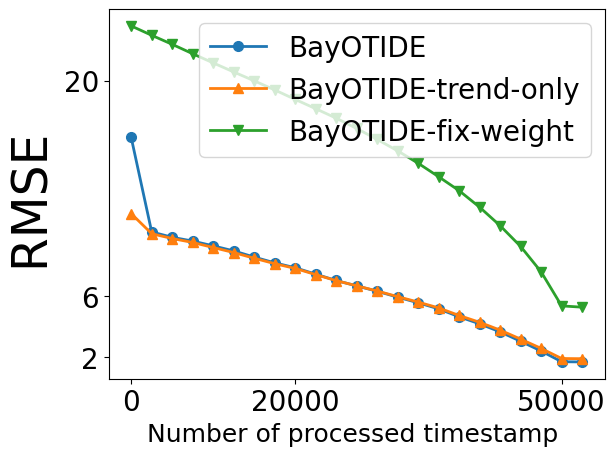

In [7]:
# plot the running rmse, with line and dots
# # plt.figure(figsize=(10,10))
# plt.plot(running_rmse,'o-', label = "BayTIDE", linewidth=3,markersize=10)
# plt.plot(running_rmse_no_weight,'o-', label = "BayTIDE-no-weight",linewidth=3, markersize=10)
# plt.plot(running_rmse_trend_only,'o-', label = "BayTIDE-trend-only",linewidth=3, markersize=10)

plt.plot(running_rmse,'o-', label = "BayOTIDE", linewidth=2,markersize=7)
plt.plot(running_rmse_trend_only,'^-', label = "BayOTIDE-trend-only",linewidth=2, markersize=7)
plt.plot(running_rmse_no_weight,'v-', label = "BayOTIDE-fix-weight",linewidth=2, markersize=7)

plt.xticks(ticks=[0,8, 21],labels=[0, 20000,50000],fontsize=20)
plt.xlabel("Number of processed timestamp ",fontsize=18)

plt.yticks(ticks =[2,6,20],fontsize=20)
plt.ylabel("RMSE ",fontsize=35)

plt.legend(fontsize=20)

plt.savefig("./figs/running_rmse-solar.pdf",bbox_inches='tight')